Sample Data


Data Preprocessing : Checking for missing values
ColumnName, DataType, MissingValues
name , object , False
gender , object , False
origin , object , False
hair , int64 , False
feathers , int64 , False
eggs , int64 , False
milk , int64 , False
airborne , int64 , False
aquatic , int64 , False
predator , int64 , False
toothed , int64 , False
backbone , int64 , False
breathes , int64 , False
venomous , int64 , False
fins , int64 , False
legs , int64 , False
tail , int64 , False
domestic , int64 , False
catsize , int64 , False
type , int64 , False
Data Preprocessing : Dropping ID column


Data Preprocessing : Checking for data type
Column Datatypes:
 gender      object
origin      object
hair         int64
feathers     int64
eggs         int64
milk         int64
airborne     int64
aquatic      int64
predator     int64
toothed      int64
backbone     int64
breathes     int64
venomous     int64
fins         int64
legs         int64
tail         int64
domestic     int64
catsize      int64
type         int64
dtype: object
Data Preprocessing : Converting Categorical to numerical 


Selected numerical :features 
 ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'type']


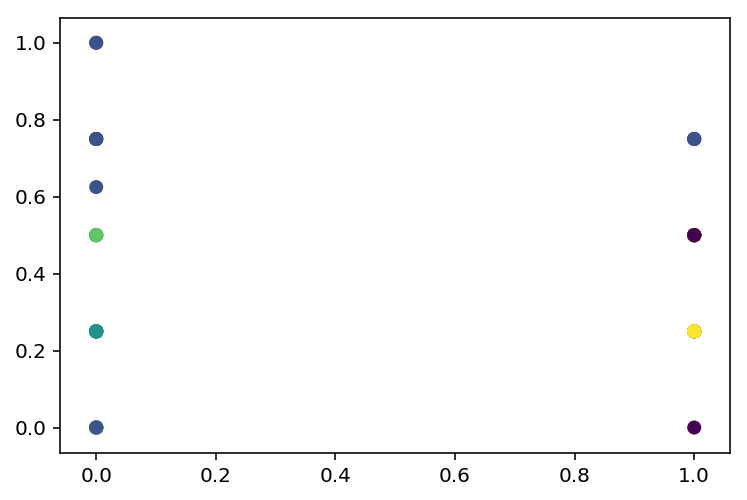

In [2]:
# Sivaranjani_A20436206
#----------------------------------------------------------------------------------------------------------------------------------------------------
# K-Means
#----------------------------------------------------------------------------------------------------------------------------------------------------
# Importing necessary packages 
import numpy as np
import scipy as sp
import pandas as pd
from IPython.display import display, HTML

# Loading data from CSV file
zoo_data=pd.read_csv('W11_zoo.csv')
cols=zoo_data.columns

print("Sample Data")
display(HTML(zoo_data.head(10).to_html()))

# Checking for missing values
print("Data Preprocessing : Checking for missing values")
print('ColumnName, DataType, MissingValues')
for i in cols:
    print(i, ',', zoo_data[i].dtype,',',zoo_data[i].isnull().any())

# Removing ID column 
print("Data Preprocessing : Dropping ID column")
zoo_data=zoo_data.drop('name',1)

# print out and display dataframe as tables in HTML
display(HTML(zoo_data.head(10).to_html()))


# Data preprocessing 
print("Data Preprocessing : Checking for data type")
print('Column Datatypes:\n',zoo_data.dtypes)


zoo_data_raw=zoo_data.copy(deep=True) 
zoo_data_cluster=zoo_data.copy(deep=True) 

# create new binary columns for categorical features
zoo_data_dummies=pd.get_dummies(zoo_data_cluster[['gender','origin']])

# add them to dataframe
zoo_data_cluster=zoo_data_cluster.join(zoo_data_dummies)
# drop original columns
zoo_data_cluster=zoo_data_cluster.drop('gender',axis=1)
zoo_data_cluster=zoo_data_cluster.drop('origin', axis=1)

print("Data Preprocessing : Converting Categorical to numerical ")
display(HTML(zoo_data_cluster.head(10).to_html()))

# Normalizing numeric independent attributes
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
cols_numeric = zoo_data_cluster.select_dtypes(include=numerics).columns.tolist()
print('Selected numerical :features \n',cols_numeric)    

# min-max normalization to scale [0, 1]
for col in cols_numeric:
    zoo_data_cluster[col]=(zoo_data_cluster[col]-zoo_data_cluster[col].min())/(zoo_data_cluster[col].max()-zoo_data_cluster[col].min())

zoo_data_kmeans=zoo_data_cluster.drop('type',axis=1)
display(HTML(zoo_data_kmeans.head(10).to_html()))

# Importing required package for KMeans clustering
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Making 5 clusters using k -means
kmeans=KMeans(n_clusters=5, random_state=1)
kmeans.fit(zoo_data_kmeans)
y_pred=kmeans.predict(zoo_data_kmeans)

# Plot the clusters
plt.scatter(zoo_data_kmeans['hair'],zoo_data_kmeans['legs'],c=y_pred,cmap='viridis')
plt.show()